# DataAugmentation

Este notebook muestra el proceso de aumento de datos utilizando TensorFlow y la biblioteca ImageDataGenerator.

Se lee un archivo CSV que contiene la información de las imágenes y se seleccionan aleatoriamente un número determinado de imágenes por clase. A continuación, se aplica el aumento de datos utilizando diferentes transformaciones, como rotación, desplazamiento, corte, zoom y volteo horizontal. Las imágenes originales y aumentadas se visualizan en un conjunto de subplots para su comparación.

Este proceso es útil para generar un conjunto de datos de entrenamiento más diverso y aumentar la cantidad de imágenes disponibles para el entrenamiento de modelos de aprendizaje automático, como redes neuronales convolucionales.

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import os
import random
from math import sqrt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [13]:
# Ruta del archivo CSV de entrada
csv_path = "../../CSVs/dataset.csv"

# Ruta del directorio donde se encuentran las imágenes
dataset_path = "../../Dataset/"

In [14]:
# Número máximo de imágenes a mostrar por clase
num_images_per_class = 1

### Lectura del archivo CSV

In [15]:
# Leer el archivo CSV
df = pd.read_csv(csv_path)

### Selección de imágenes variadas por clase

In [16]:
# Obtener las clases únicas
classes = df['class'].unique()

In [17]:
# Crear una lista vacía para almacenar las imágenes seleccionadas
selected_images = []

In [18]:
# Recorrer las clases y seleccionar imágenes aleatorias
for c in classes:
    images = df[df['class'] == c]['path'].tolist()
    selected_images.extend(random.sample(images, num_images_per_class))

In [19]:
# Número máximo de imágenes a mostrar
num_images = num_images_per_class * len(classes)

### Aumento de datos

In [37]:
from keras.applications.mobilenet_v2 import preprocess_input

# Aumento de datos
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    brightness_range=(0.8, 1.2),
    channel_shift_range=20,
    preprocessing_function=preprocess_input # valores entre -1 y 1 -> necesario para mobilenetv2
)


### Visualización de las imágenes seleccionadas

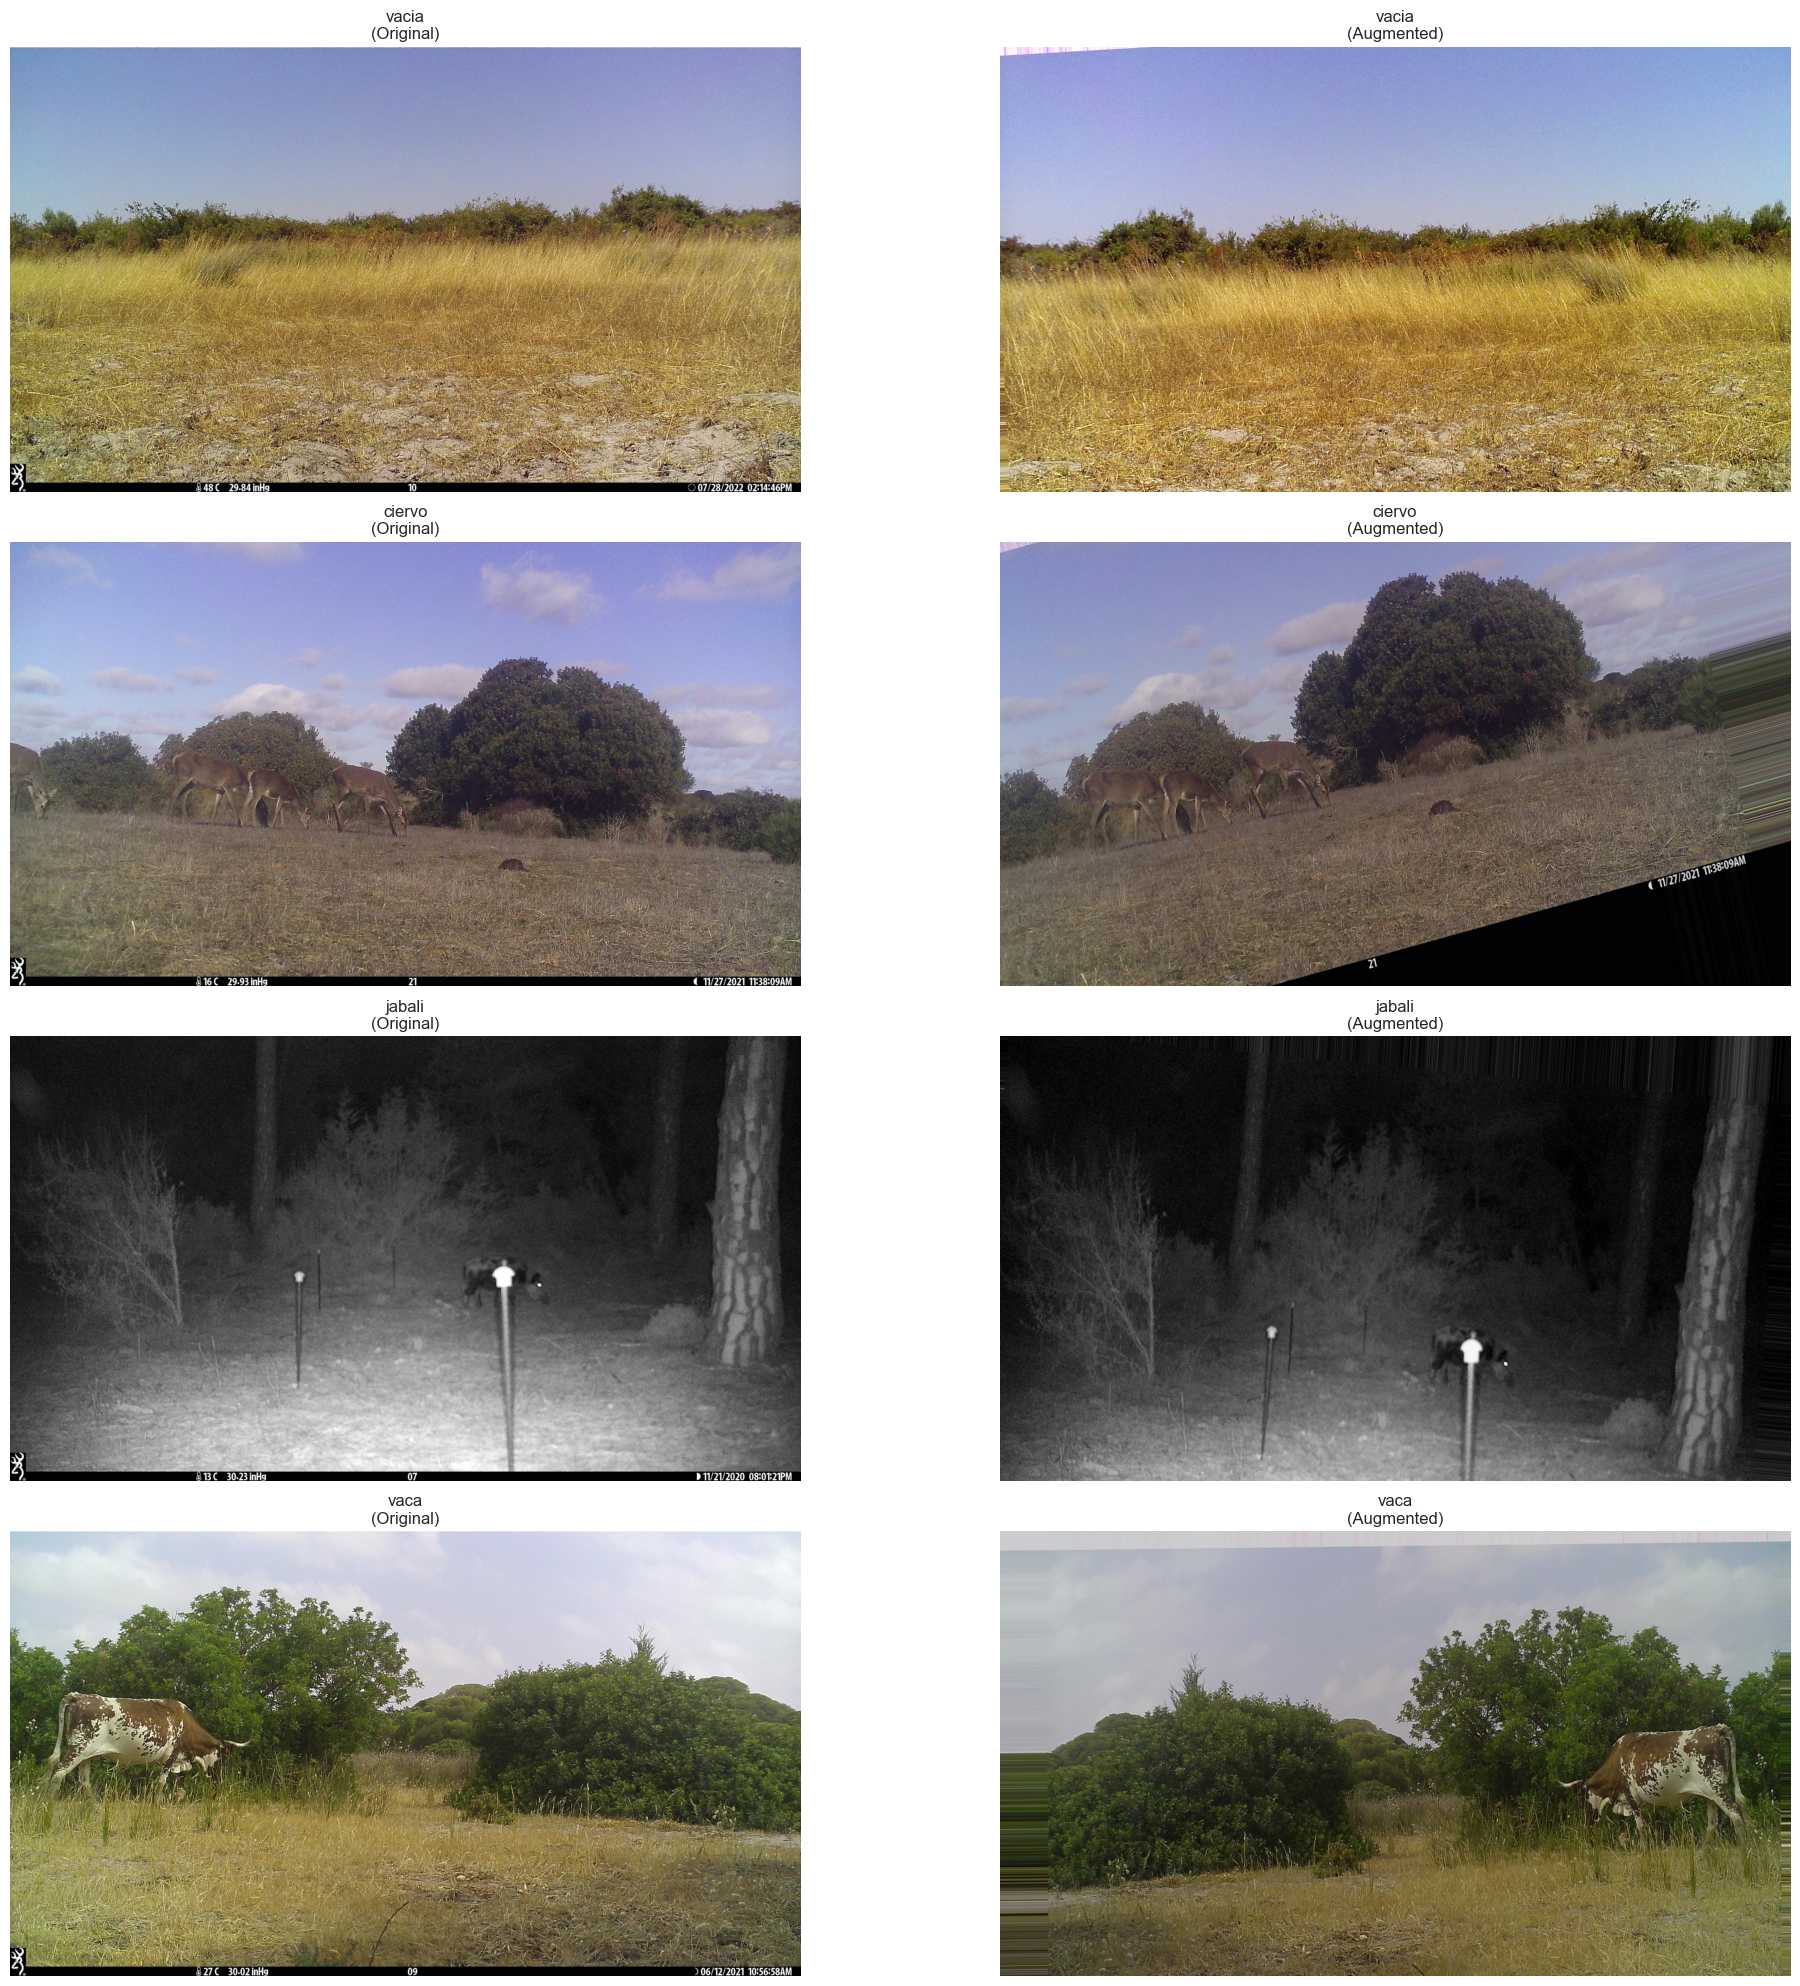

In [38]:
# Visualización de las imágenes seleccionadas
fig, axs = plt.subplots(nrows=num_images // 2, ncols=2, figsize=(20, 20))
fig.tight_layout(pad=1.5)

for i, ax_row in enumerate(axs):
    image_path = os.path.join(dataset_path, selected_images[i])
    image = cv2.imread(image_path)
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    label = df[df['path'] == selected_images[i]]['class'].values[0]

    # Mostrar la imagen original en la primera columna
    ax_row[0].imshow(image_rgb)
    ax_row[0].set_title(f"{label}\n(Original)")
    ax_row[0].axis('off')

    # Aplicar el aumento de datos a una imagen de la misma fila
    augmented_images = datagen.flow(tf.expand_dims(image_rgb, axis=0), batch_size=1)
    augmented_image = next(augmented_images)[0].astype('float32')

    # Escalar los valores nuevamente al rango de 0 a 255
    augmented_image = ((augmented_image + 1) / 2) * 255
    augmented_image = augmented_image.astype('uint8')

    ax_row[1].imshow(augmented_image)
    ax_row[1].set_title(f"{label}\n(Augmented)")
    ax_row[1].axis('off')

# Mostrar la figura
plt.show()
